In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Library**


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import h5py
import shutil

# **Dataset**


In [3]:
df  = pd.read_excel('/content/drive/MyDrive/Capstone/orang dan penyakit.xlsx')
df

,No,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Jenis Aktivitas,Kolesterol,Asam Lambung,Diabetes Tipe 1,Diabetes Tipe 2,Darah Tinggi,Darah Rendah,Usus Buntu
0,1,Laki-laki,30,70,170,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak
1,2,Perempuan,45,65,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,Laki-laki,55,80,175,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,4,Perempuan,40,55,165,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya
4,5,Laki-laki,50,90,180,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak
5,6,Perempuan,35,60,155,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
6,7,Laki-laki,42,75,172,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
7,8,Perempuan,28,52,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
8,9,Laki-laki,60,85,178,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
9,10,Perempuan,47,63,158,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya


# **EDA (Exploratory Data Analysis)**


Missing Value

In [4]:
df.isna().sum()

 No                  0
 Jenis Kelamin       0
 Usia                0
 Berat (kg)          0
 Tinggi (cm)         0
 Jenis Aktivitas     0
 Kolesterol          0
 Asam Lambung        0
 Diabetes Tipe 1     0
 Diabetes Tipe 2     0
 Darah Tinggi        0
 Darah Rendah        0
 Usus Buntu          0
dtype: int64

**Duplicate**

In [5]:
df.duplicated().sum()

0

**Shape**

In [6]:
df.shape

(50, 13)

Type

In [7]:
df.dtypes

 No                   int64
 Jenis Kelamin       object
 Usia                 int64
 Berat (kg)           int64
 Tinggi (cm)          int64
 Jenis Aktivitas     object
 Kolesterol          object
 Asam Lambung        object
 Diabetes Tipe 1     object
 Diabetes Tipe 2     object
 Darah Tinggi        object
 Darah Rendah        object
 Usus Buntu          object
dtype: object

In [8]:
df.columns

Index([' No ', ' Jenis Kelamin ', ' Usia ', ' Berat (kg) ', ' Tinggi (cm) ',
       ' Jenis Aktivitas ', ' Kolesterol ', ' Asam Lambung ',
       ' Diabetes Tipe 1 ', ' Diabetes Tipe 2 ', ' Darah Tinggi ',
       ' Darah Rendah ', ' Usus Buntu '],
      dtype='object')

# **Preprocessing**

Rename

In [9]:
df.rename(columns={
    " No ":"no",
    " Jenis Kelamin ":"jenis_kelamin",
    " Usia ":"usia",
    " Berat (kg) ":"berat(kg)",
    " Tinggi (cm) ":"tinggi(cm)",
    " Jenis Aktivitas ":"jenis_aktivitas",
    " Kolesterol ":"kolesterol",
    " Asam Lambung ":"asam_lambung",
    " Diabetes Tipe 1 ":"diabetes_tipe_1",
    " Diabetes Tipe 2 ":"diabetes_tipe_2",
    " Darah Tinggi ":"darah_tinggi",
    " Darah Rendah ":"darah_rendah",
    " Usus Buntu ":"usus_buntu"
    },inplace=True)

In [10]:
df.columns

Index(['no', 'jenis_kelamin', 'usia', 'berat(kg)', 'tinggi(cm)',
       'jenis_aktivitas', 'kolesterol', 'asam_lambung', 'diabetes_tipe_1',
       'diabetes_tipe_2', 'darah_tinggi', 'darah_rendah', 'usus_buntu'],
      dtype='object')

In [11]:
ordinal_columns = ['jenis_aktivitas','kolesterol','asam_lambung','diabetes_tipe_1','diabetes_tipe_2','darah_tinggi','darah_rendah','usus_buntu']
onehot_columns = ['jenis_kelamin']

In [12]:
df

,no,jenis_kelamin,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu
0,1,Laki-laki,30,70,170,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak
1,2,Perempuan,45,65,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,Laki-laki,55,80,175,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,4,Perempuan,40,55,165,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya
4,5,Laki-laki,50,90,180,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak
5,6,Perempuan,35,60,155,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
6,7,Laki-laki,42,75,172,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
7,8,Perempuan,28,52,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
8,9,Laki-laki,60,85,178,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
9,10,Perempuan,47,63,158,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya


In [13]:
train_df = df.copy()

**Encoding**

In [14]:
# Encode ordinal and onehot columns
for col in ordinal_columns:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])
train_df = pd.get_dummies(train_df, columns=onehot_columns)

train_df

,no,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu,jenis_kelamin_ Laki-laki,jenis_kelamin_ Perempuan
0,1,30,70,170,2,1,0,0,1,0,0,0,1,0
1,2,45,65,160,1,0,1,0,0,0,0,0,0,1
2,3,55,80,175,0,1,0,0,0,1,0,0,1,0
3,4,40,55,165,2,0,0,0,0,0,0,1,0,1
4,5,50,90,180,0,0,0,1,1,0,0,0,1,0
5,6,35,60,155,2,0,0,0,0,0,0,0,0,1
6,7,42,75,172,2,1,0,0,0,0,0,0,1,0
7,8,28,52,160,1,0,1,0,0,0,0,0,0,1
8,9,60,85,178,0,1,0,0,0,1,0,0,1,0
9,10,47,63,158,2,0,0,0,0,0,0,1,0,1


**Normalisasi**

In [15]:
# Normalize
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)


In [16]:
train_df.head()

,no,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu,jenis_kelamin_ Laki-laki,jenis_kelamin_ Perempuan
0,0.000000,0.142857,0.500,0.6,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.020408,0.571429,0.375,0.2,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.040816,0.857143,0.750,0.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.061224,0.428571,0.125,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.081633,0.714286,1.000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# **Model**

Mengambil atribut yang akan digunakan untuk clustering

In [17]:
# drop column no
train_df = train_df.drop(['no'], axis=1)

Convert X to TensorFlow tensor

In [18]:
# convert train_df to tensor
X = train_df.copy()
X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)

In [19]:
# export X_tensor to h5 file
with h5py.File('X_tensor.h5', 'w') as hf:
    hf.create_dataset("human_tensor",  data=X_tensor)

**Membangun model K-Means dengan TensorFlow**

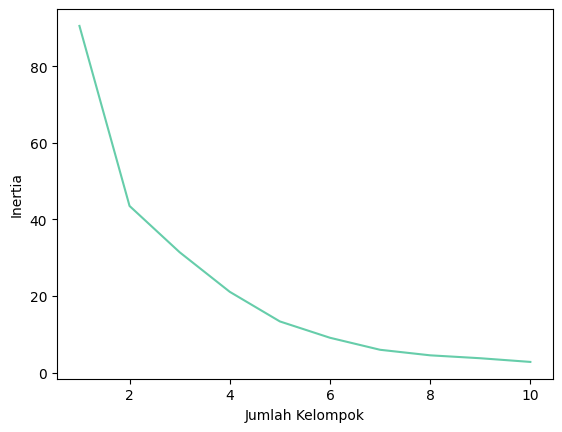

In [20]:
inertia_all = []

for i in range(1, 11):
    kmeans_all = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans_all.fit(X_tensor)
    inertia_all.append(kmeans_all.inertia_)

plt.plot(range(1, 11), inertia_all, color='mediumaquamarine')
plt.xlabel('Jumlah Kelompok')
plt.ylabel('Inertia')
plt.show()

In [21]:
input_dim = X.shape[1]
n_clusters = 5

Definisikan input layer

In [22]:
input_layer = Input(shape=(input_dim,))

Definisikan hidden layer

In [23]:
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

**Definisikan output layer**

In [24]:
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

**Definisikan model autoencoder**

In [25]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

Compile model dengan menggunakan Mean Squared Error

In [26]:
autoencoder.compile(optimizer='adam', loss='mse')

Melatih model autoencoder

In [27]:
autoencoder.fit(X_tensor, X_tensor, epochs=50, batch_size=32, shuffle=True)
autoencoder.save('model_human.h5')


Epoch 1/50
2/2 [==============================] - 2s 13ms/step - loss: 0.2371
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2143
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1927
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1744
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1590
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1473
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1363
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1268
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1190
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1111
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1037
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0966
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - loss: 0

In [28]:
new_model = tf.keras.models.load_model('model_human.h5')

# Show the model architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 13)                845   

Menggunakan model autoencoder untuk mendapatkan representasi tersembunyi

In [29]:
hidden_representation = Model(inputs=input_layer, outputs=encoded)
X_encoded = hidden_representation.predict(X_tensor)

2/2 [==============================] - 0s 7ms/step


Melakukan clustering dengan K-Means

In [30]:
kmeans = KMeans(n_clusters=n_clusters,  n_init=10, random_state=42)
kmeans.fit(X_encoded)

KMeans(n_clusters=5, n_init=10, random_state=42)

Mengklasifikasikan data ke dalam kelompok

In [31]:
labels = kmeans.labels_

Menambahkan kolom "Kelompok" ke dalam dataframe

In [32]:
df['Kelompok'] = labels
train_df['Kelompok'] = labels

Menampilkan hasil pengelompokan

In [33]:
train_df

,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu,jenis_kelamin_ Laki-laki,jenis_kelamin_ Perempuan,Kelompok
0,0.142857,0.500,0.60,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,0.571429,0.375,0.20,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,0.857143,0.750,0.80,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.428571,0.125,0.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,0.714286,1.000,1.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
5,0.285714,0.250,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,0.485714,0.625,0.68,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
7,0.085714,0.050,0.20,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
8,1.000000,0.875,0.92,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
9,0.628571,0.325,0.12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [34]:
df

,no,jenis_kelamin,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu,Kelompok
0,1,Laki-laki,30,70,170,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,2
1,2,Perempuan,45,65,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,3
2,3,Laki-laki,55,80,175,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,0
3,4,Perempuan,40,55,165,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,1
4,5,Laki-laki,50,90,180,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,4
5,6,Perempuan,35,60,155,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,1
6,7,Laki-laki,42,75,172,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,2
7,8,Perempuan,28,52,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,3
8,9,Laki-laki,60,85,178,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,0
9,10,Perempuan,47,63,158,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,1


In [35]:
# Drop column no
df = df.drop(['no'], axis=1)

In [36]:
# export df to csv
df.to_csv('Clustered orang dan penyakit.csv', index=False)

In [37]:
train_df.to_csv('Preprocessed Clustered orang dan penyakit.csv', index=False)

# **Visualisasi**


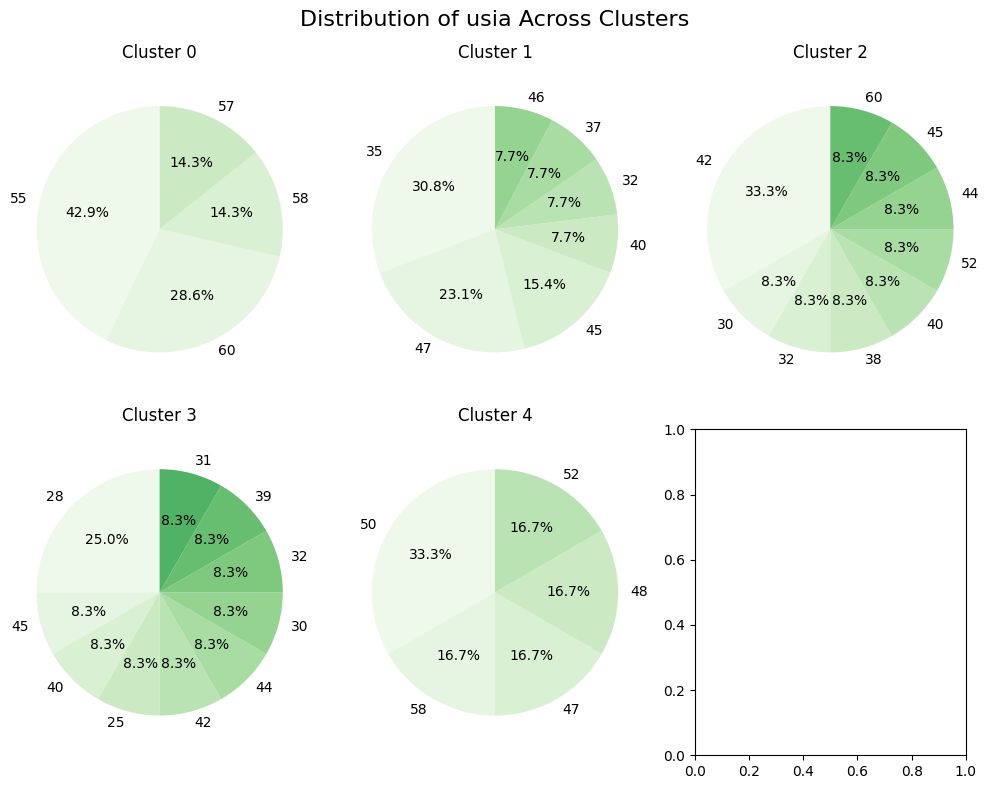

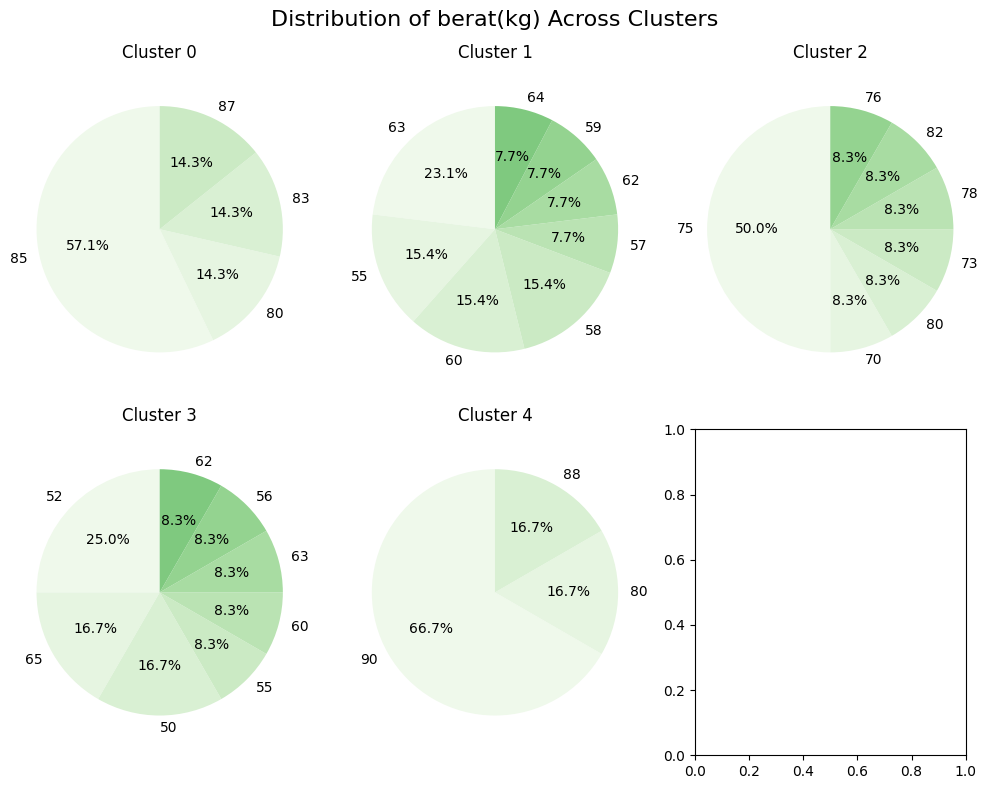

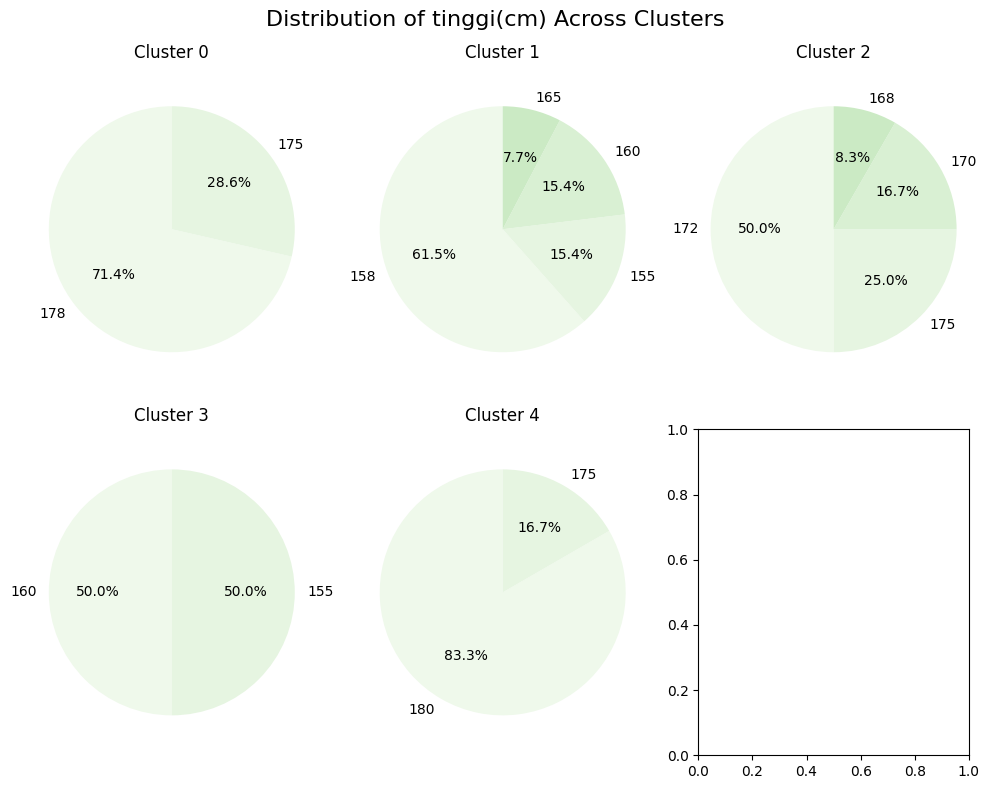

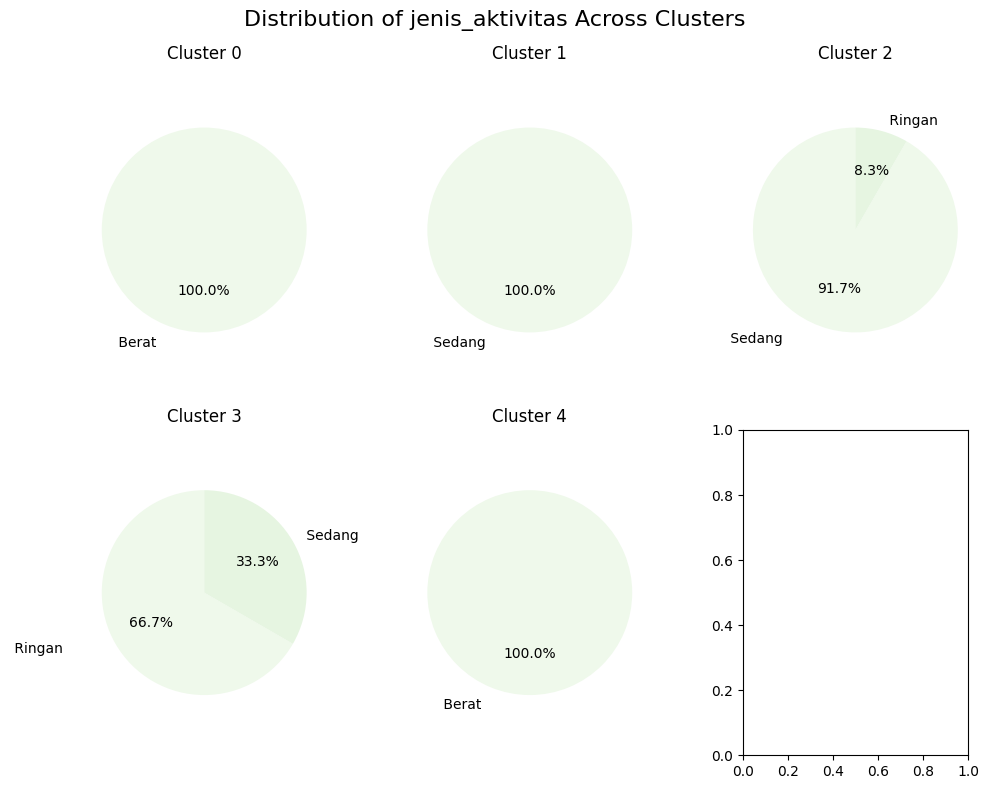

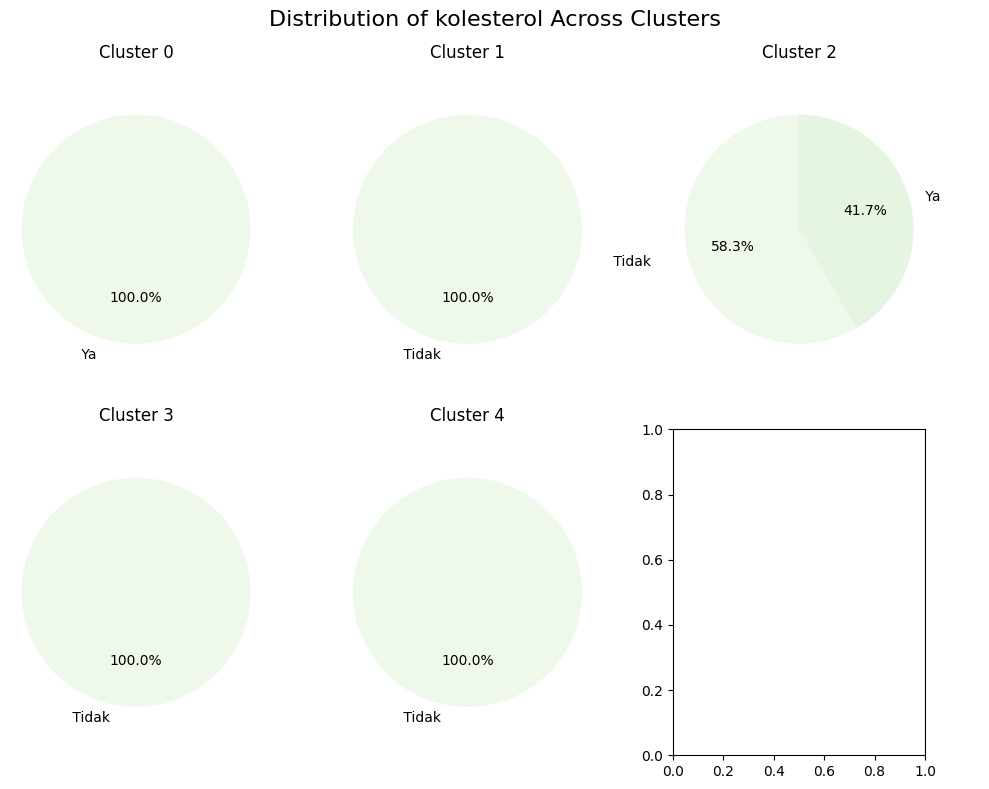

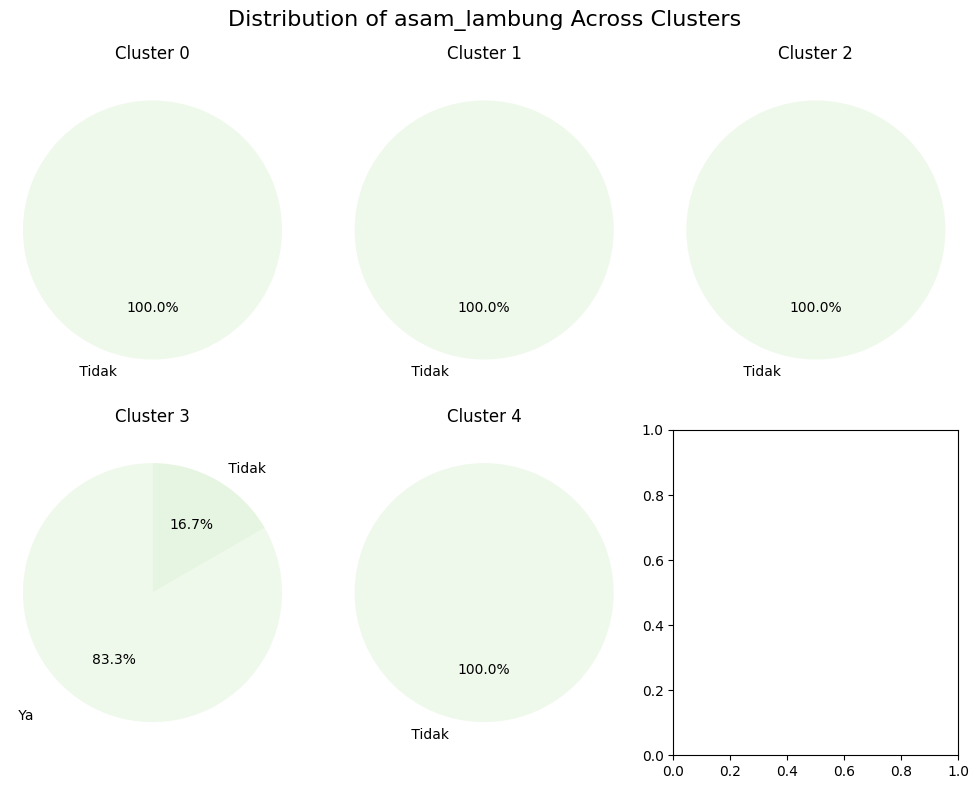

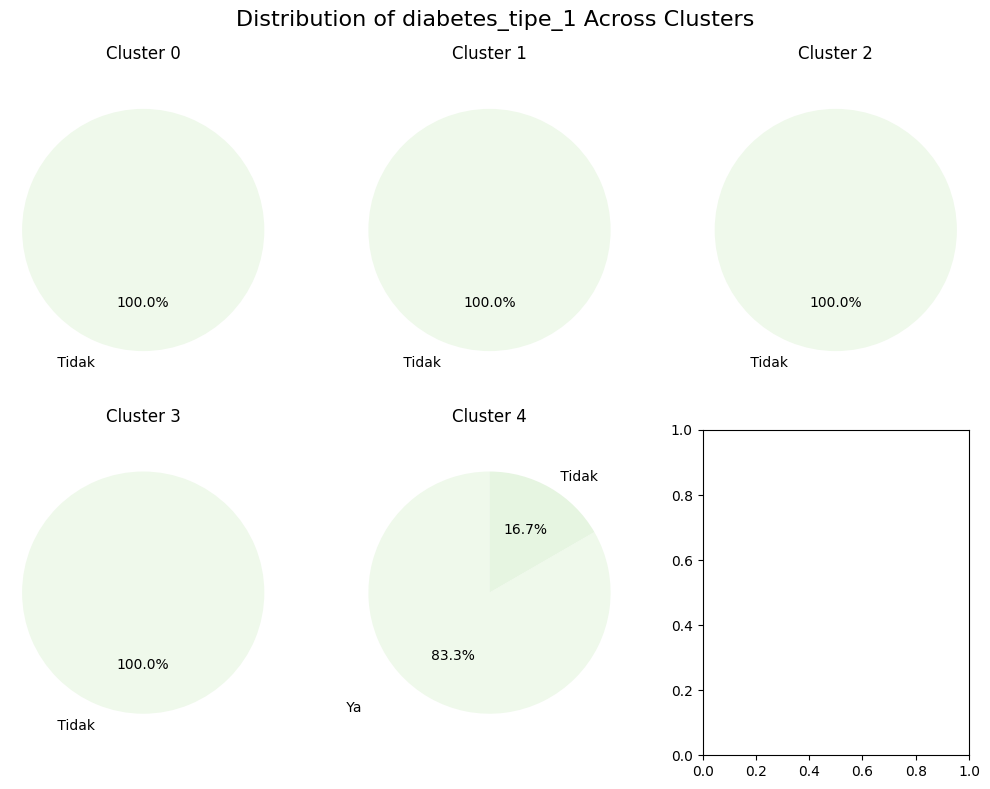

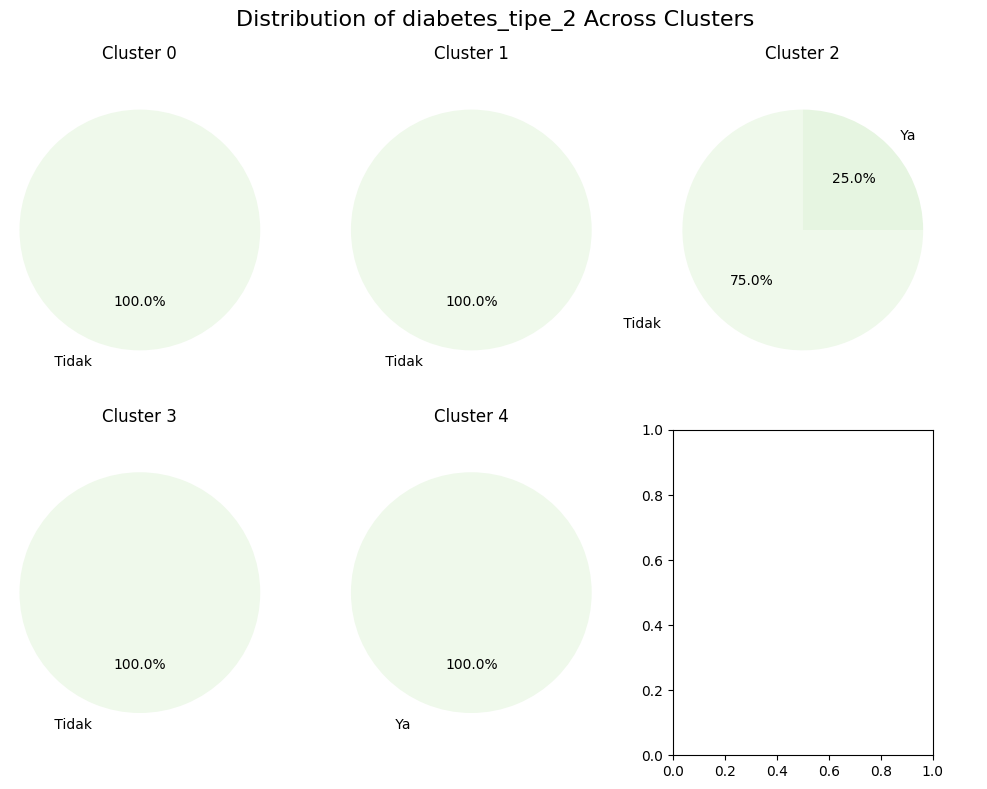

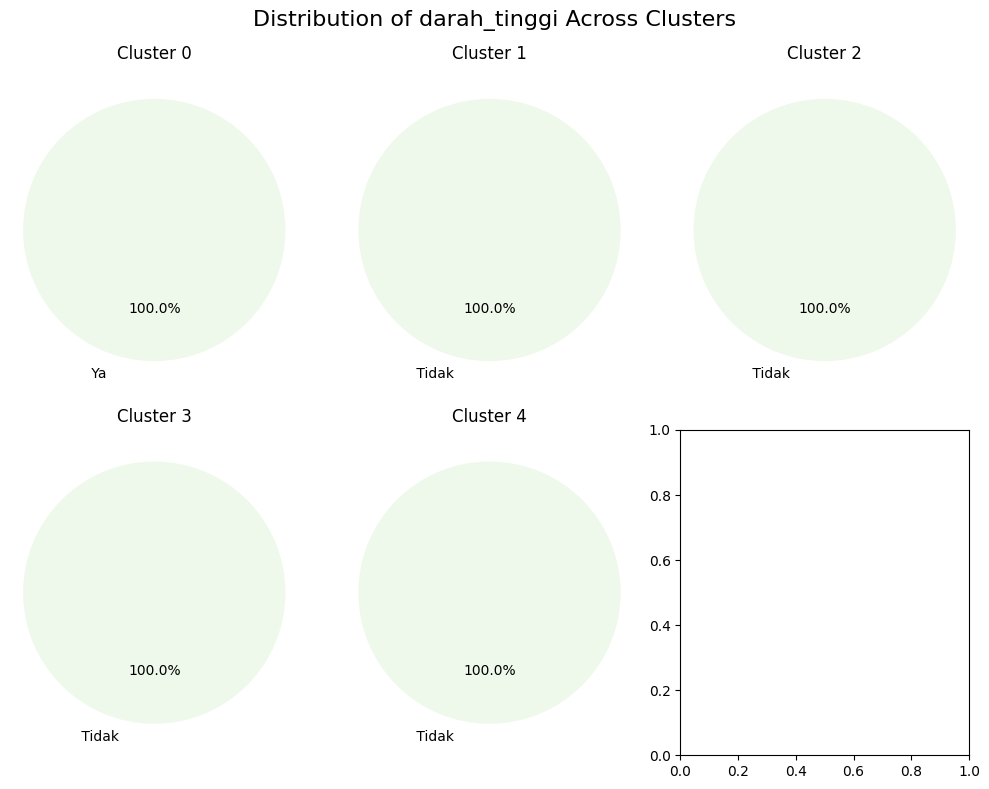

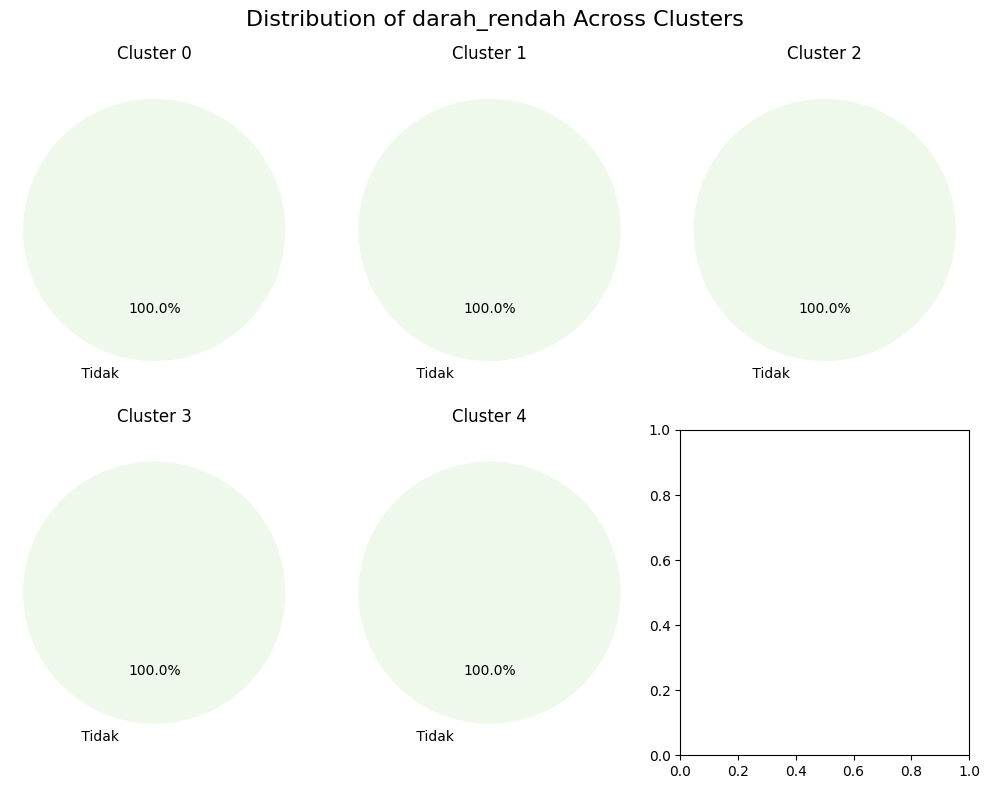

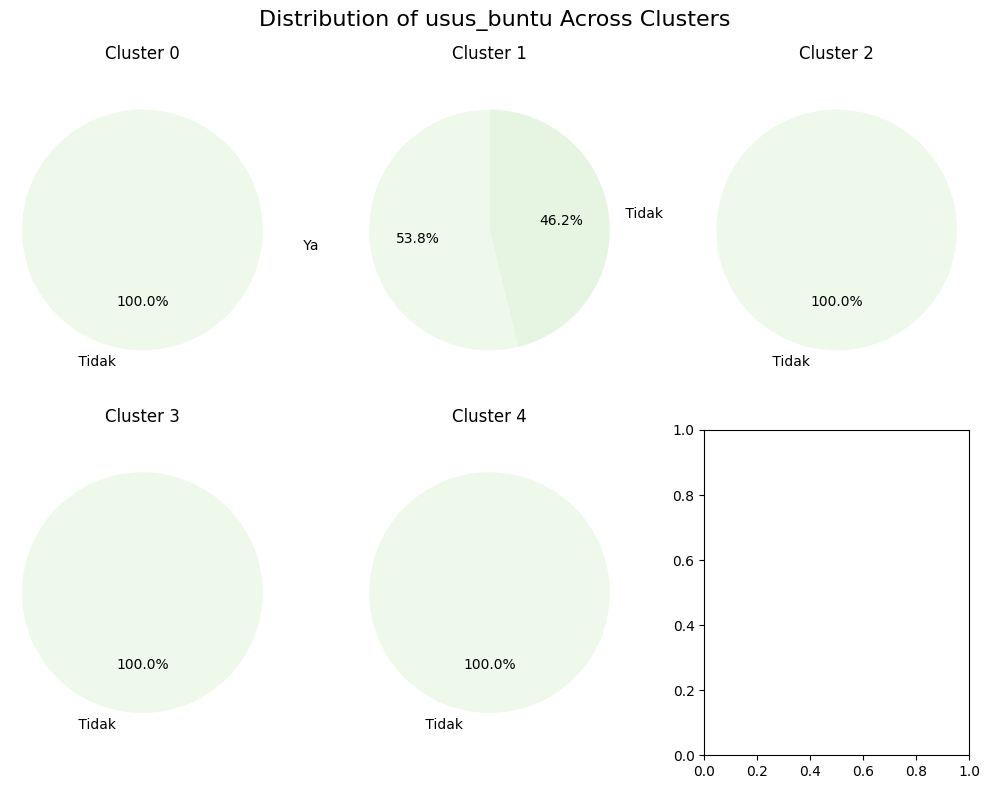

In [38]:
# import clustered df
df = pd.read_csv('Clustered orang dan penyakit.csv')
attribute_names = ['usia', 'berat(kg)', 'tinggi(cm)', 'jenis_aktivitas', 'kolesterol', 'asam_lambung', 'diabetes_tipe_1', 'diabetes_tipe_2', 'darah_tinggi', 'darah_rendah', 'usus_buntu']

palette = sns.color_palette("Greens", n_colors=16)

for attribute in attribute_names:
    attribute_counts = []

    for cluster_label in range(n_clusters):
        attribute_value_counts = df.loc[df['Kelompok'] == cluster_label, attribute].value_counts()
        attribute_counts.append(attribute_value_counts)

    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    fig.suptitle(f'Distribution of {attribute} Across Clusters', fontsize=16)

    for cluster_label, attribute_count, ax in zip(range(n_clusters), attribute_counts, axs.flat[:-1]):
        ax.pie(attribute_count, labels=attribute_count.index, autopct='%1.1f%%', startangle=90, colors=palette)
        ax.axis('equal')
        ax.set_title(f'Cluster {cluster_label}')

    plt.tight_layout()
    plt.show()


kolesterol 100% = cluster 4
kolesterol 41% = cluster 1

asamlambung 100% = cluster 3

diabetes_tipe_1 16% = cluster 2

diabetes_tipe_2 100% = cluster 2
diabetes_tipe_2 25% = cluster 1

darah tinggi 100% = cluster 4

usus buntu 46% = cluster 0

## Kesimpulan : 
1. Cluster 0 = Usia dan berat badan normal, namun memiliki kecenderungan usus buntu
2. Cluster 1 = **usia rata rata** an dan memiliki **berat badan tinggi** karena banyak yang mengalami **kolesterol** dan **diabetes tipe 2**
3. Cluster 2 = Cenderung **usia tua** dan **berat badan tinggi** karena **semuanya memiliki penyakit diabetes tipe 2 dan beberapa diabetes tipe 1**
4. Cluster 3 = memiliki rata rata usia dan berat badan **normal**, namun memiliki kecenderungan **asam lambung tinggi**
5. Cluster 4 = Cenderung **lebih tua** dan memiliki **berat lebih tinggi** karena **banyak** yang mengalami **kolesterol** dan **darah tinggi**

# EDA & Clustering Food Dataset

In [39]:
# import nutrients file csv
df = pd.read_csv('/content/drive/MyDrive/Capstone/nutrients_csvfile.csv')

df.head()

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,cows milk,976,660,32.0,40.0,36.0,0,48.0
1,Susu rendah lemak,984,360,36.0,0.0,0.0,0,52.0
2,Goats' milk,244,165,8.0,10.0,8.0,0,11.0
3,Cheese,225,240,30.0,11.0,10.0,0,6.0
4,Eggs Scrambled or fried,128,220,13.0,16.0,14.0,0,1.0


In [40]:
df.shape

(95, 8)

In [41]:
# Separate the Food Column
foods = df['Food']
df = df.drop(['Food'], axis=1)

# Drop grams column
df = df.drop(['Grams'], axis=1)

In [42]:
# Remove all the rows that cant be converted to float
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [43]:
df.shape

(90, 6)

In [44]:
# create df train
train_df = df.copy()

# Normalize
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

train_df.head()

,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,0.881720,0.891892,1.000,1.000000,0.0,0.311688
1,0.478495,1.000000,0.000,0.000000,0.0,0.337662
2,0.216398,0.243243,0.250,0.222222,0.0,0.071429
3,0.317204,0.837838,0.275,0.277778,0.0,0.038961
4,0.290323,0.378378,0.400,0.388889,0.0,0.006494


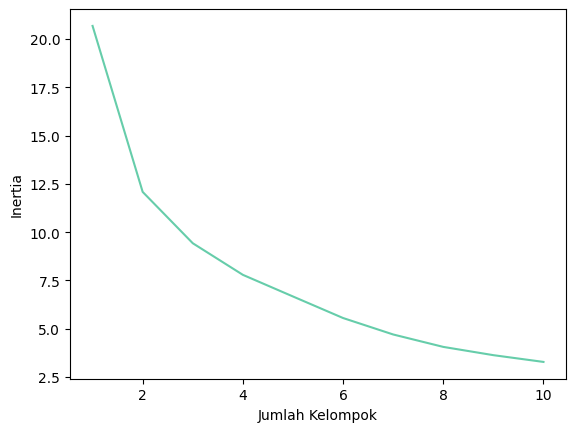

In [45]:
# cluster the nutrients
X = train_df.copy()
X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)

# export X_tensor to h5 file
with h5py.File('food_tensor.h5', 'w') as hf:
    hf.create_dataset("X_tensor",  data=X_tensor)

inertia_all = []

for i in range(1, 11):
    kmeans_all = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans_all.fit(X_tensor)
    inertia_all.append(kmeans_all.inertia_)

plt.plot(range(1, 11), inertia_all, color='mediumaquamarine')
plt.xlabel('Jumlah Kelompok')
plt.ylabel('Inertia')
plt.show()

In [46]:
# autoencoder
input_dim = X.shape[1]
n_clusters = 8

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_tensor, X_tensor, epochs=50, batch_size=32, shuffle=True)
autoencoder.save('model_food.h5')

Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 0.0688
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0639
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0594
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0506
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0459
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0415
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0316
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0271
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0.

In [47]:
# clustering
new_model = tf.keras.models.load_model('model_food.h5')

# Show the model architecture
new_model.summary()

hidden_representation = Model(inputs=input_layer, outputs=encoded)
X_encoded = hidden_representation.predict(X_tensor)

kmeans = KMeans(n_clusters=n_clusters,  n_init=10, random_state=42)
kmeans.fit(X_encoded)

labels = kmeans.labels_


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 6)                 390 

In [48]:
labels

array([4, 3, 5, 1, 1, 5, 0, 1, 1, 4, 4, 3, 3, 7, 1, 1, 1, 5, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 5, 5, 0, 0, 0, 0, 0,
       5, 5, 5, 0, 0, 5, 5, 0, 5, 2, 0, 0, 0, 5, 5, 6, 3, 5, 5, 5, 0, 1,
       5, 5, 5, 0, 1, 0, 0, 0, 5, 2, 4, 1, 1, 1, 0, 5, 5, 5, 3, 2, 3, 3,
       0, 0], dtype=int32)

In [49]:
# reassamble the dataframe
df['Kelompok'] = labels
df['Food'] = foods
df

,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Kelompok,Food
0,660,32.0,40.0,36.0,0.0,48.0,4,cows milk
1,360,36.0,0.0,0.0,0.0,52.0,3,Susu rendah lemak
2,165,8.0,10.0,8.0,0.0,11.0,5,Goats' milk
3,240,30.0,11.0,10.0,0.0,6.0,1,Cheese
4,220,13.0,16.0,14.0,0.0,1.0,1,Eggs Scrambled or fried
...,...,...,...,...,...,...,...,...
90,192,19.0,11.0,2.0,5.0,9.0,2,tempe
91,200,15.0,10.0,4.0,0.0,5.0,3,bakso
92,200,20.0,10.0,2.0,0.0,1.0,3,pepes ikan
93,61,3.5,3.3,2.1,0.0,4.7,0,yoghur


In [50]:

train_df.columns

Index(['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs'], dtype='object')

<ipython-input-51-2cef2b415aae>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Kelompok').mean().plot(kind='bar', figsize=(10, 8))


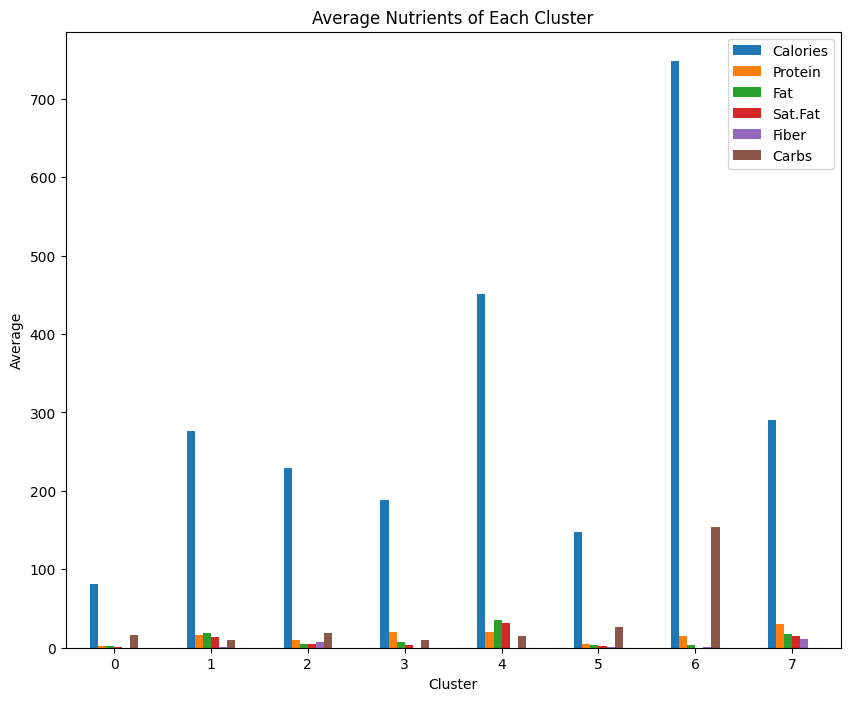

In [51]:
# Get average of each columns of each cluster then visualize
df.groupby('Kelompok').mean().plot(kind='bar', figsize=(10, 8))
plt.title('Average Nutrients of Each Cluster')
plt.ylabel('Average')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()


### Kesimpulan 

1. Makanan 0 adalah makanan yang memiliki keseimbangan antara banyaknya makanan dengan jumlah kalori. Cocok untuk orang orang yang memiliki darah rendah

2. Makanan 1 memiliki jummlah sedikit namun mengandung kalori dan karbohidrat yang sangat tinggi. cocok untuk orang orang yang memiliki aktivitas berat. tidak cocok untuk penderita diabetes

3. Makanan 2 adalah makanan yang berjumlah banyak untuk dikonsumsi, namun jumlah kalorinya lebih sedikit dari banyaknya makanan yang dikonsumsi. Makanan ini juga banyak mengandung akan protein dan lemak. cocok untuk menurunkan berat badan dan penderita diabetes

4. Makanan 3 adalah makanan yang memiliki jumlah sedikit namun mengandung kalori yang tinggi, meskipun begitu, kandungan gizi makanan ini cukup lengkap, terdapat protein dan lemak. tidak cocok untuk penderita diabetes. sangat cocok untuk cocok untuk orang orang yang memiliki aktivitas berat

5. Makanan 4 adalah makanan yang berjumlah banyak namun memiliki sedikit kalori dibandingkan jumlah makanannya. 

In [52]:
# Get food from each cluster
for cluster_label in range(n_clusters):
    print(f'Cluster {cluster_label}:')
    print(df.loc[df['Kelompok'] == cluster_label, 'Food'].values)
    print('\n')

Cluster 0:
['Mayonnaise' 'Beans' 'Broccoli' 'Carrots' 'Corn' 'French-fried'
 'Potato chips' 'Spinach' 'Tomatoes' 'Tomato juice' 'Turnip greens'
 'Banana' 'Grapes' 'Grape juice' 'Lemon juice' 'Orange juice' 'Papaya'
 'Pineapple' 'Pineapple juice' 'Tangerines' 'Corn bread ground meal'
 'Cornflakes' 'Corn grits cooked' 'chicken soup' 'Vegetable' 'Cupcake'
 'Fruit cake' 'Chocolate creams' 'Tea' 'yoghur' 'capcay']


Cluster 1:
['Cheese' 'Eggs Scrambled or fried' 'Beef' 'Hamburger' 'Roasted chicken'
 'Duck' 'Lamb' 'Cream soups' 'Bread pudding' 'coconut sweetened'
 'Peanut butter' 'Peanuts']


Cluster 2:
['Bread' 'Ice cream' 'tempe']


Cluster 3:
['Susu rendah lemak' 'Corned beef' 'Corned beef hash canned'
 'Fish sticks fried' 'Sardines' 'Scallops' 'Shrimp' 'Tuna'
 'Spaghetti with meat sauce' 'tahu' 'bakso' 'pepes ikan']


Cluster 4:
['cows milk' 'Roast beef' 'Steak' 'Almonds']


Cluster 5:
["Goats' milk" 'Yolks' 'Crab meat' 'Sweet potatoes' 'Apples' 'Blueberries'
 'Cantaloupe' 'Cherries' 'Pe

In [53]:
# export df to csv
df.to_csv('Clustered makanan.csv', index=False)

In [54]:
# Create pair cluster for nutrients and human
df_human = pd.read_csv('Preprocessed Clustered orang dan penyakit.csv')
df_food = pd.read_csv('Clustered makanan.csv')

# Create json for pairing
food_recom = {}
food_recom[0] = [5]
food_recom[1] = [0]
food_recom[2] = [0]
food_recom[3] = [6, 1, 4, 7]
food_recom[4] = [0, 2, 3]

In [55]:
# import json library
import json

# export json
with open('food_recom.json', 'w') as json_file:
    json.dump(food_recom, json_file)


# Prediksi Model

In [56]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [57]:
X.shape[1]

6

In [58]:
# import preprocessed clustered data
df = pd.read_csv('Preprocessed Clustered orang dan penyakit.csv')

# separate X and y
X = df.drop(['Kelompok'], axis=1)
y = df.Kelompok

n_clusters = 5
input_dim = X.shape[1]

# split data into train and test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create keras layer sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(n_clusters, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
model.evaluate(X_test, y_test)


Epoch 1/50
2/2 [==============================] - 2s 221ms/step - loss: 1.5910 - accuracy: 0.1500 - val_loss: 1.5359 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 1.5530 - accuracy: 0.2000 - val_loss: 1.5047 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 1.5214 - accuracy: 0.3250 - val_loss: 1.4808 - val_accuracy: 0.7000
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 1.4946 - accuracy: 0.4000 - val_loss: 1.4581 - val_accuracy: 0.7000
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 1.4688 - accuracy: 0.4250 - val_loss: 1.4359 - val_accuracy: 0.7000
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 1.4436 - accuracy: 0.5000 - val_loss: 1.4137 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 1.4174 - accuracy: 0.5750 - val_loss: 1.3907 - val_accuracy: 0.8000
Epoch 8/50
2/2 [==========

[0.3011346459388733, 1.0]

In [59]:
# Create keras layer sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(n_clusters, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=50, batch_size=32)

# export model to h5 file
model.save('prediction_model.h5')

Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 1.6782 - accuracy: 0.0800
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 1.6436 - accuracy: 0.1000
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 1.6108 - accuracy: 0.1800
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 1.5847 - accuracy: 0.3000
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 1.5609 - accuracy: 0.5400
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 1.5393 - accuracy: 0.5600
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 1.5205 - accuracy: 0.6000
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 1.5014 - accuracy: 0.6800
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 1.4843 - accuracy: 0.8000
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 1.4670 - accuracy: 0.8000
Epoch 11/50
2/2 [====================